In [1]:
# Dependencies 
tetration_dl = os.environ.get('TETRATION_DL', os.getcwd())
sys.path.append(tetration_dl)
from sage_tetration import *

# Base of the super-logarithm (hyper-4-logarithm)
# Natural logarithm (hyper-3-logarithm) of the base
b = var('b')
lnb = log(b)

# number of terms in the power series
order = 10

# Number of bits in floating-point numbers 
prec = 53

# default coefficient ring
ring = SR

# Power series ring over x
_.<x> = PowerSeriesRing(ring, 'x')

# Super-logarithm matrix

it is something

In [2]:
show(superlog_matrix(lnb, 4, ring=ring))

[               1                1                1                1]
[      log(b) - 1         2*log(b)         3*log(b)         4*log(b)]
[    1/2*log(b)^2   2*log(b)^2 - 1     9/2*log(b)^2       8*log(b)^2]
[    1/6*log(b)^3     4/3*log(b)^3 9/2*log(b)^3 - 1    32/3*log(b)^3]

# Super-logarithm power series

it is

In [3]:
slog_ser = superlog_series(lnb, x, order=3, ring=ring)
show([c.canonicalize_radical() for c in slog_ser.coefficients()])

[-1,
 (8*log(b)^3 + 5*log(b)^2 + 10*log(b) + 2)/(2*log(b)^3 + 5*log(b)^2 + 4*log(b) + 2),
 -3*(2*log(b)^3 - 3*log(b)^2)/(2*log(b)^3 + 5*log(b)^2 + 4*log(b) + 2),
 2*(log(b)^3 - 2*log(b)^2 - log(b) + 1)/(2*log(b)^3 + 5*log(b)^2 + 4*log(b) + 2)]

verbose 0 (2717: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 66 points.
verbose 0 (2717: plot.py, generate_plot_points) Last error message: 'unable to simplify to float approximation'


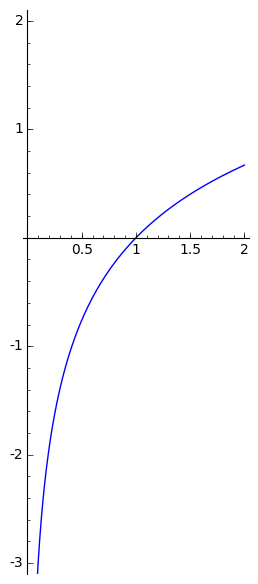

In [4]:
def slog(x):
    return sum([c*x**k for k, c in enumerate(slog_ser.coefficients())])
plot(lambda x: slog(log(x)/lnb) + 1, (-1, 2), ymin=-3, ymax=2, aspect_ratio=1)

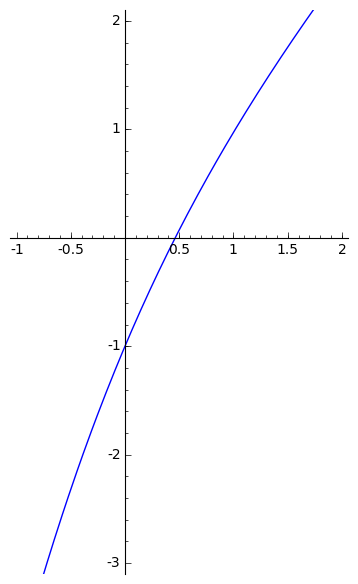

In [5]:
def slog(x):
    return sum([c*x**k for k, c in enumerate(slog_ser.coefficients())])
plot(slog, (-1, 2), ymin=-3, ymax=2, aspect_ratio=1)

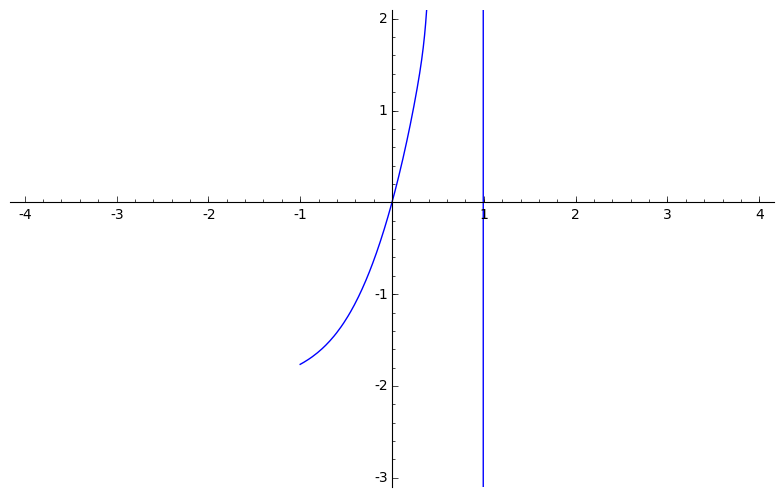

In [13]:
def slog(x):
    return sum([c*x**k for k, c in enumerate(slog_ser.coefficients())])
plot(lambda x: slog(exp(x*lnb)) - 1, (-1, 2)).show(xmin=-4, xmax=4, ymin=-3, ymax=2, aspect_ratio=1)

In [5]:
(lambda x: slog_ser.polynomial().subs(x=x))(1)

0.999999724140167

In [6]:
z = var('z')
[diff(10^z, z, k).subs(z=1) for k in range(6)]

[10, 10*log(10), 10*log(10)^2, 10*log(10)^3, 10*log(10)^4, 10*log(10)^5]

In [19]:
def carleman_matrix(expr, x_x0, order=10, ring=SR):
    x, x0 = x_x0
    return matrix([[ring(diff(expr^j, x, k).subs(**{(str(x)): x0}) - kronecker_delta(j, k)*factorial(k))
                    for k in range(0, order + 1)]
                    for j in range(0, order + 1)])


In [20]:
show(carleman_matrix(10^z, (z, 0), 5))

[                   0                    0                    0                    0                    0                    0]
[                   1          log(10) - 1            log(10)^2            log(10)^3            log(10)^4            log(10)^5]
[                   1            2*log(10)      4*log(10)^2 - 2          8*log(10)^3         16*log(10)^4         32*log(10)^5]
[                   1            3*log(10)          9*log(10)^2     27*log(10)^3 - 6         81*log(10)^4        243*log(10)^5]
[                   1            4*log(10)         16*log(10)^2         64*log(10)^3   256*log(10)^4 - 24       1024*log(10)^5]
[                   1            5*log(10)         25*log(10)^2        125*log(10)^3        625*log(10)^4 3125*log(10)^5 - 120]

'z'

In [1]:
from Jupyter.external import mathjax; mathjax.install_mathjax()

ImportError: No module named Jupyter.external

In [2]:
z = var('z')
show(carleman_matrix(10^z, (z, 0), 5))

[                   0                    0                    0                    0                    0                    0]
[                   1          log(10) - 1        1/2*log(10)^2        1/6*log(10)^3       1/24*log(10)^4      1/120*log(10)^5]
[                   1            2*log(10)      2*log(10)^2 - 1        4/3*log(10)^3        2/3*log(10)^4       4/15*log(10)^5]
[                   1            3*log(10)        9/2*log(10)^2    9/2*log(10)^3 - 1       27/8*log(10)^4      81/40*log(10)^5]
[                   1            4*log(10)          8*log(10)^2       32/3*log(10)^3   32/3*log(10)^4 - 1     128/15*log(10)^5]
[                   1            5*log(10)       25/2*log(10)^2      125/6*log(10)^3     625/24*log(10)^4 625/24*log(10)^5 - 1]

In [3]:
z = var('z')
show(transpose(superlog_matrix(lnb, 5)))

[                 1        log(10) - 1      1/2*log(10)^2      1/6*log(10)^3     1/24*log(10)^4]
[                 1          2*log(10)    2*log(10)^2 - 1      4/3*log(10)^3      2/3*log(10)^4]
[                 1          3*log(10)      9/2*log(10)^2  9/2*log(10)^3 - 1     27/8*log(10)^4]
[                 1          4*log(10)        8*log(10)^2     32/3*log(10)^3 32/3*log(10)^4 - 1]
[                 1          5*log(10)     25/2*log(10)^2    125/6*log(10)^3   625/24*log(10)^4]

In [4]:
show(transpose(abel_matrix(10^z, (z, 0), 5)))

[                 1        log(10) - 1      1/2*log(10)^2      1/6*log(10)^3     1/24*log(10)^4]
[                 1          2*log(10)    2*log(10)^2 - 1      4/3*log(10)^3      2/3*log(10)^4]
[                 1          3*log(10)      9/2*log(10)^2  9/2*log(10)^3 - 1     27/8*log(10)^4]
[                 1          4*log(10)        8*log(10)^2     32/3*log(10)^3 32/3*log(10)^4 - 1]
[                 1          5*log(10)     25/2*log(10)^2    125/6*log(10)^3   625/24*log(10)^4]